In [1064]:
import pandas as pd
import numpy as np
import gc
from sklearn.metrics import mean_squared_error
from contextlib import contextmanager
import time
from datetime import datetime

In [1004]:
@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print('%s done in %s s' %(name, time.time()-t0))

In [1005]:
def transform(month):
    if month < 10:
        month = "0%s" %month
    else:
        month = "%s" %month
    data = pd.read_csv("months1_10/%s.csv" %month, parse_dates=['time_stamp'])
    data = data.groupby(['loc_id', 'time_stamp'], as_index=False)['phone_id'].agg({'count':'count'})
    print (month, data.shape)
    return data

In [1006]:
data = None

for month in range(1, 12):
    temp = transform(month)
    if data is None:
        data = temp.copy()
    else:
        data = pd.concat([data, temp], axis=0)
    del temp; gc.collect()

01 (24285, 3)
02 (20999, 3)
03 (23995, 3)
04 (18069, 3)
05 (23727, 3)
06 (21931, 3)
07 (24428, 3)
08 (24471, 3)
09 (23712, 3)
10 (23520, 3)
11 (22876, 3)


In [1007]:
data['hour'] = data.time_stamp.dt.hour
data['weekday'] = data.time_stamp.dt.dayofweek
data['month'] = data.time_stamp.dt.month
data['date'] = data.time_stamp.dt.date
data['dayofyear'] = data.time_stamp.dt.dayofyear
data['week_hour'] = data.weekday.astype(str) + "_" + data.hour.astype(str)

In [ ]:
def wea_coef(x):
    if x == "晴":
        return 1.03
    elif "雨" in x:
        return 0.89
    else:
        return 1

(22876, 11)
(22869, 11)
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739       1 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740       1 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741       1 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742       1 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743       1 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.523792  722.832522   晴  
740      6_20        0.382728  528.164106   晴  
741      6_21        0.406707  561.255152   晴  
742      6_22        0.450169  621.232671   晴  
743      6_23        0.343012  473.357063   晴  


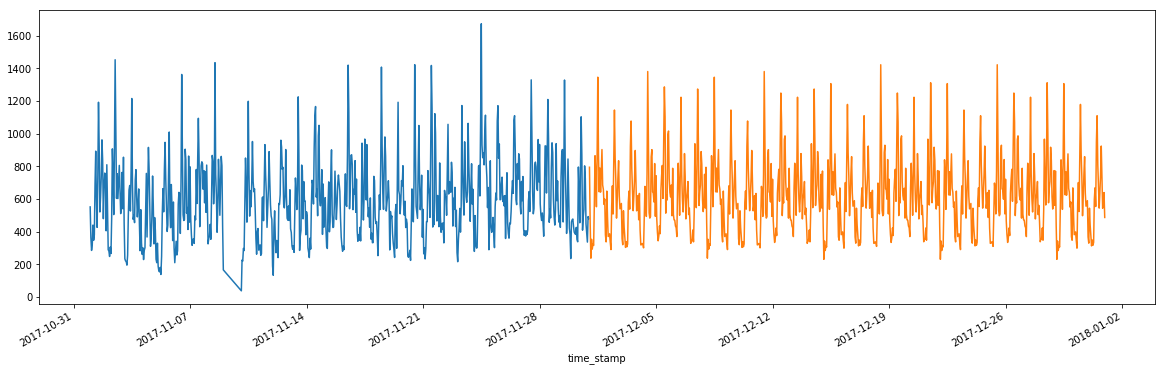

calculate 1 done in 9.46609902381897 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739       2 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740       2 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741       2 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742       2 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743       2 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.507460  673.906656   晴  
740      6_20        0.362471  481.361897   晴  
741      6_21        0.408761  542.833971   晴  
742      6_22        0.519893  690.417751   晴  
743      6_23        0.550497  731.060444   晴  


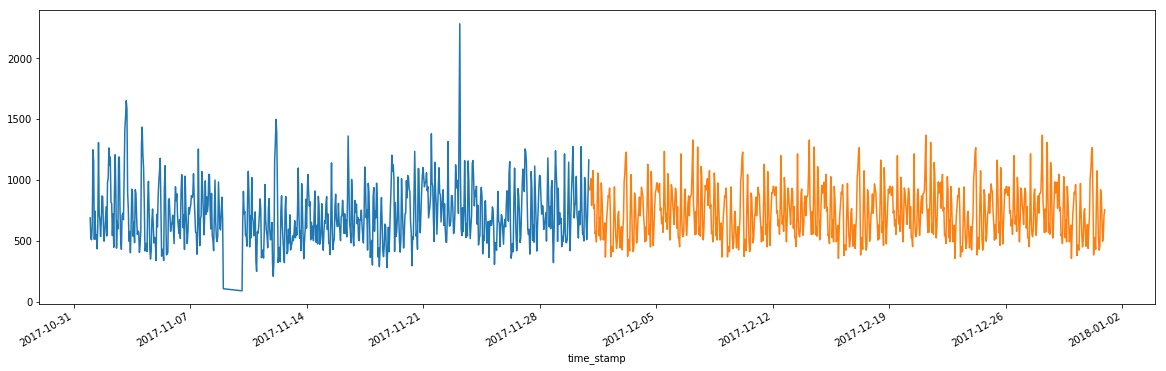

calculate 2 done in 3.955085277557373 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739       3 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740       3 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741       3 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742       3 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743       3 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef    best_pred wea  
739      6_19        0.505844  1179.628697   晴  
740      6_20        0.384107   895.737651   晴  
741      6_21        0.383797   895.015282   晴  
742      6_22        0.462684  1078.978606   晴  
743      6_23        0.195151   455.092516   晴  


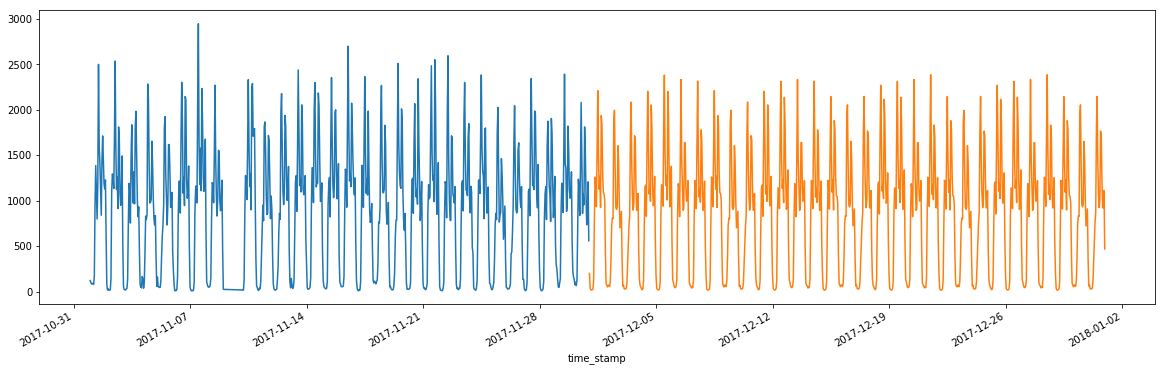

calculate 3 done in 4.389302730560303 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739       4 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740       4 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741       4 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742       4 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743       4 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.524371  628.720535   晴  
740      6_20        0.422293  506.329604   晴  
741      6_21        0.428486  513.754495   晴  
742      6_22        0.538554  645.725929   晴  
743      6_23        0.396724  475.671994   晴  


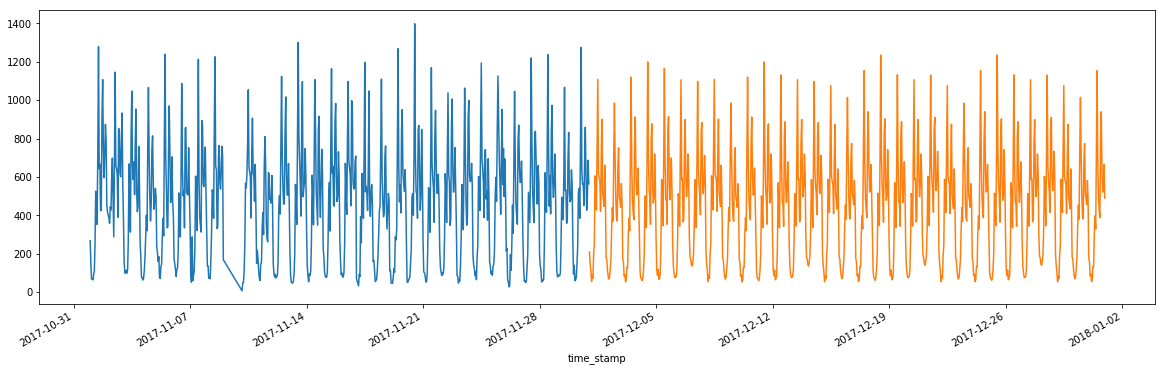

calculate 4 done in 2.4452149868011475 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739       5 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740       5 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741       5 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742       5 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743       5 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.608325  743.372737   晴  
740      6_20        0.425598  520.081165   晴  
741      6_21        0.463476  566.367118   晴  
742      6_22        0.514880  629.183767   晴  
743      6_23        0.384599  469.980437   晴  


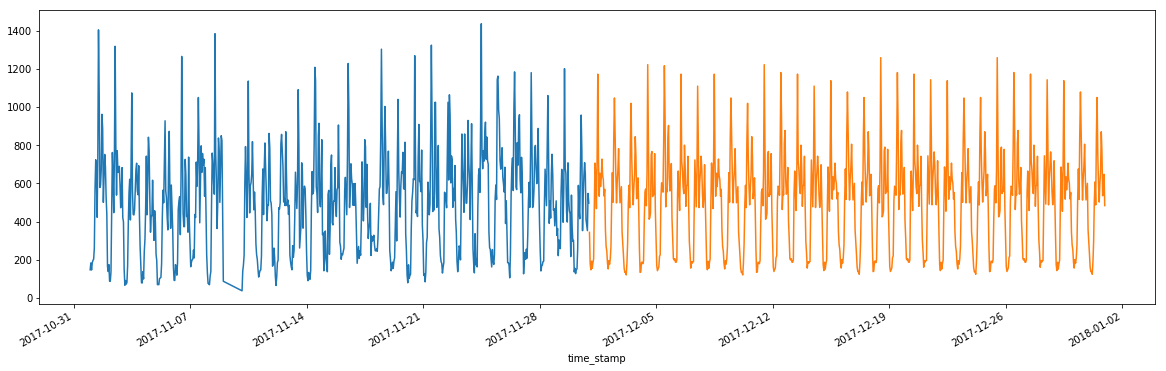

calculate 5 done in 2.5534706115722656 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739       6 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740       6 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741       6 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742       6 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743       6 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.597109  966.122405   晴  
740      6_20        0.478395  774.042442   晴  
741      6_21        0.459634  743.687836   晴  
742      6_22        0.538367  871.077656   晴  
743      6_23        0.434722  703.380901   晴  


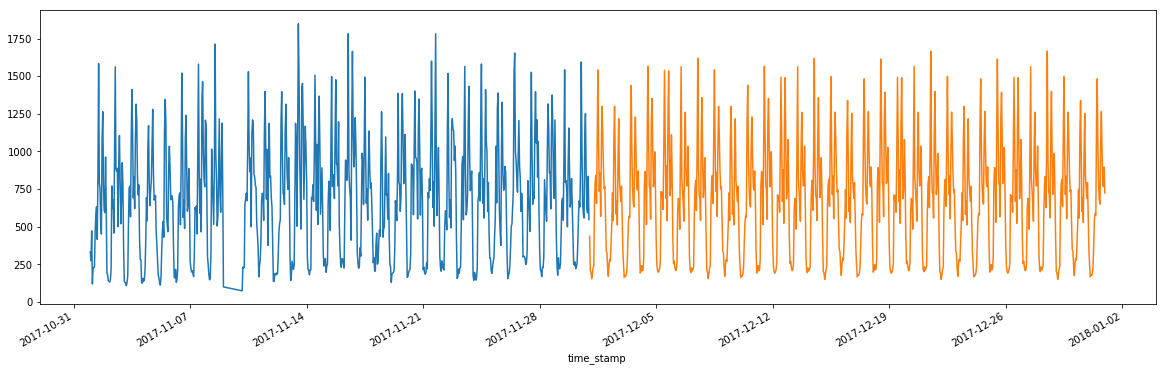

calculate 6 done in 3.425307273864746 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739       7 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740       7 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741       7 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742       7 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743       7 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.604739  403.360662   晴  
740      6_20        0.507334  338.391501   晴  
741      6_21        0.410681  273.924032   晴  
742      6_22        0.426852  284.710417   晴  
743      6_23        0.341482  227.768334   晴  


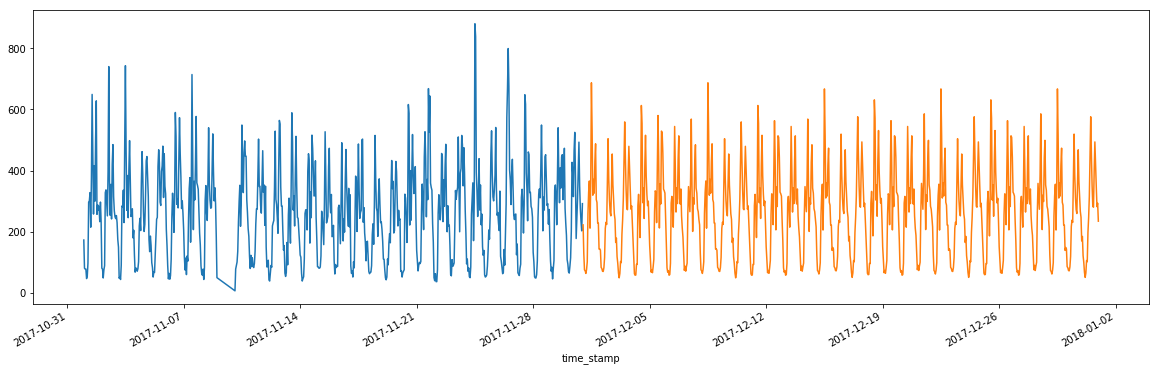

calculate 7 done in 1.694960117340088 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739       8 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740       8 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741       8 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742       8 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743       8 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef    best_pred wea  
739      6_19        0.367629  3030.002215   晴  
740      6_20        0.256522  2114.251129   晴  
741      6_21        0.210091  1731.567111   晴  
742      6_22        0.265761  2190.403568   晴  
743      6_23        0.076336   629.158472   晴  


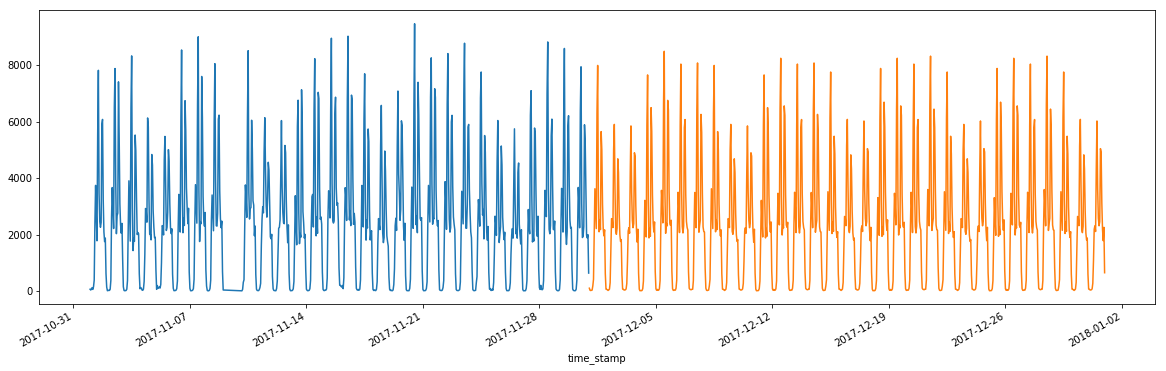

calculate 8 done in 14.637356519699097 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739       9 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740       9 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741       9 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742       9 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743       9 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.552074  308.057143   晴  
740      6_20        0.500000  279.000000   晴  
741      6_21        0.423502  236.314286   晴  
742      6_22        0.411521  229.628571   晴  
743      6_23        0.805530  449.485714   晴  


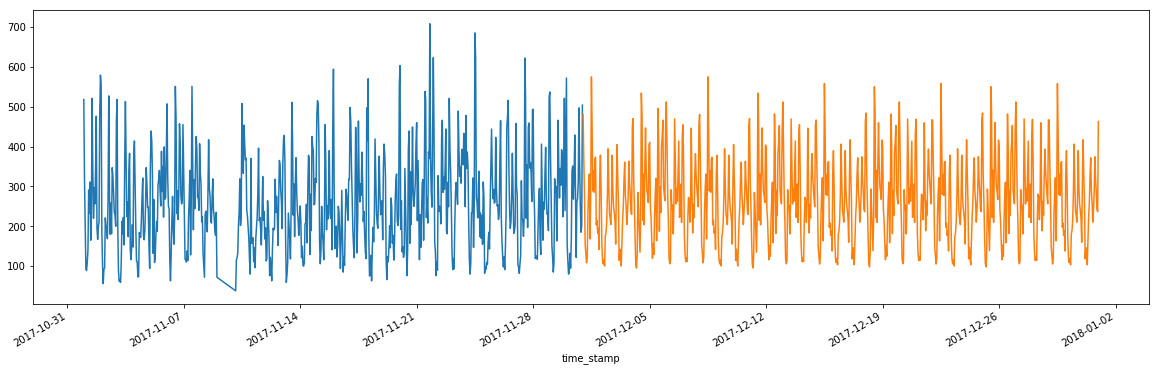

calculate 9 done in 1.4557099342346191 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      10 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      10 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      10 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      10 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      10 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef    best_pred wea  
739      6_19        0.175800  1096.115163   晴  
740      6_20        0.112877   703.785089   晴  
741      6_21        0.108343   675.515692   晴  
742      6_22        0.057522   358.652618   晴  
743      6_23        0.022473   140.117884   晴  


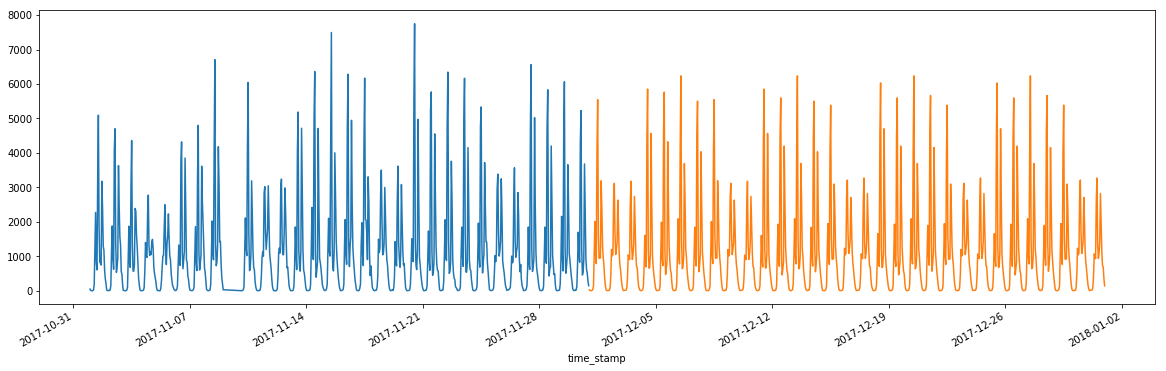

calculate 10 done in 11.583906888961792 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      11 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      11 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      11 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      11 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      11 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.477415  545.208281   晴  
740      6_20        0.393350  449.205772   晴  
741      6_21        0.439147  501.505646   晴  
742      6_22        0.593057  677.271435   晴  
743      6_23        0.531786  607.299456   晴  


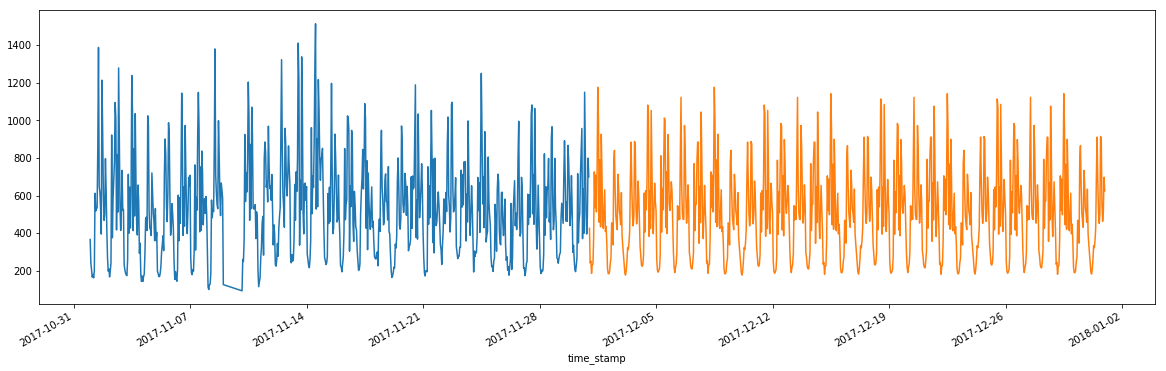

calculate 11 done in 2.7168846130371094 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      12 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      12 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      12 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      12 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      12 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef    best_pred wea  
739      6_19        0.305071  2999.153235   晴  
740      6_20        0.218420  2147.282770   晴  
741      6_21        0.168764  1659.121440   晴  
742      6_22        0.206153  2026.689556   晴  
743      6_23        0.059370   583.671156   晴  


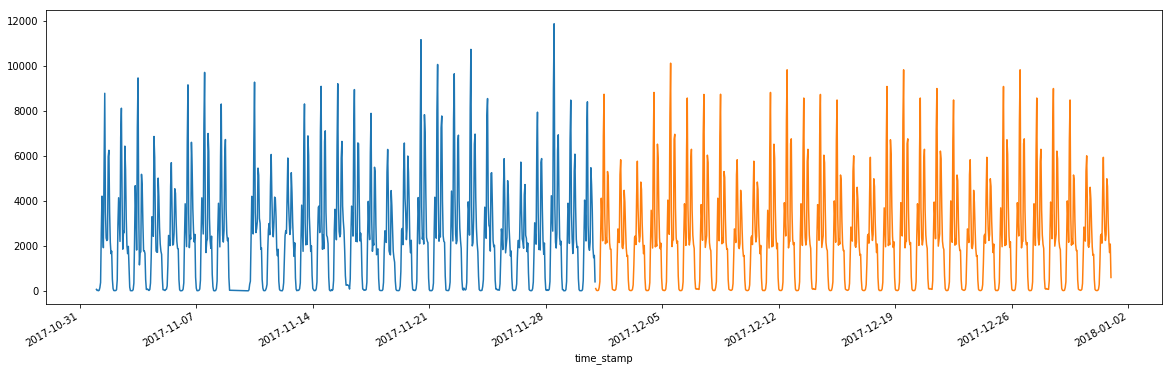

calculate 12 done in 19.183902978897095 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      13 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      13 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      13 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      13 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      13 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.434118  355.976766   晴  
740      6_20        0.403546  330.907979   晴  
741      6_21        0.441149  361.742586   晴  
742      6_22        0.484256  397.089575   晴  
743      6_23        0.274839  225.368389   晴  


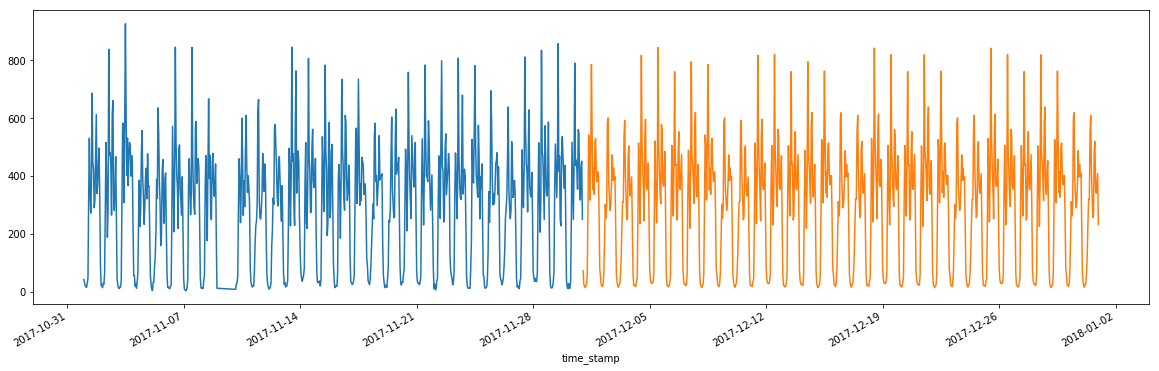

calculate 13 done in 1.8134410381317139 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      14 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      14 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      14 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      14 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      14 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.445275  319.707536   晴  
740      6_20        0.376495  270.323565   晴  
741      6_21        0.343600  246.705144   晴  
742      6_22        0.291567  209.345096   晴  
743      6_23        0.111543   80.087919   晴  


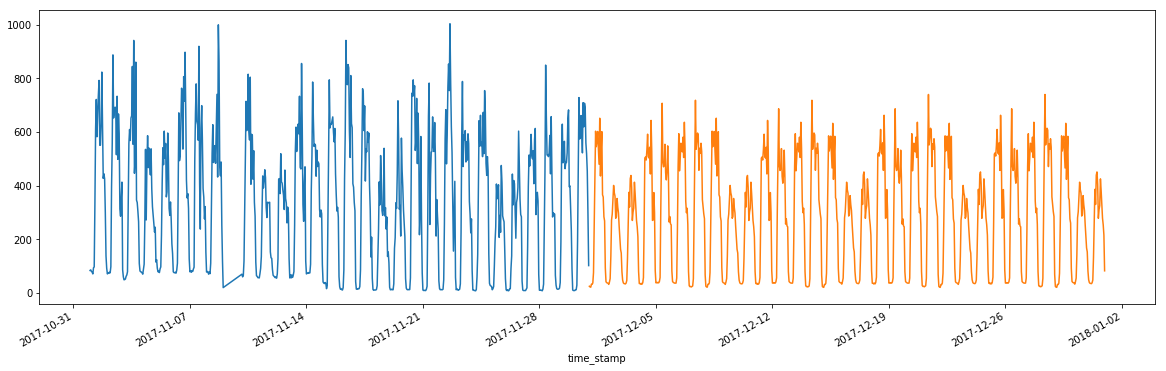

calculate 14 done in 2.176915407180786 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      15 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      15 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      15 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      15 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      15 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.290892  319.980925   晴  
740      6_20        0.257988  283.786361   晴  
741      6_21        0.292561  321.816881   晴  
742      6_22        0.356938  392.632332   晴  
743      6_23        0.119218  131.139723   晴  


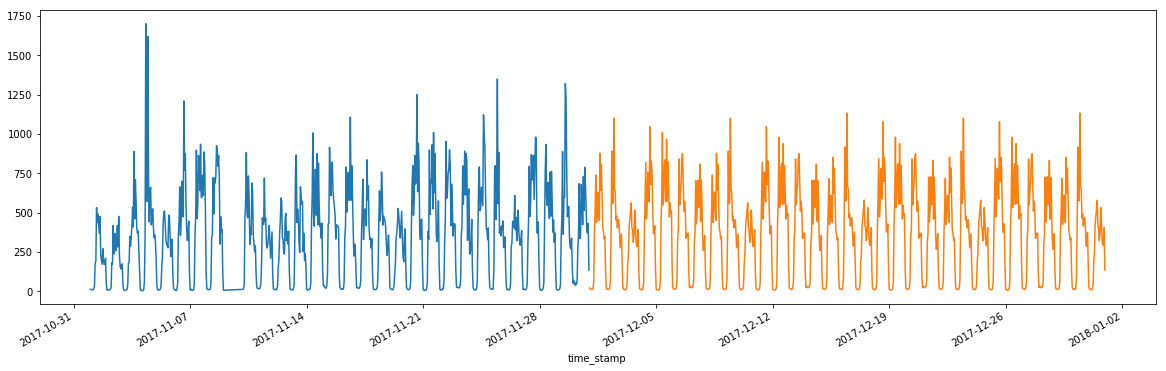

calculate 15 done in 2.9554412364959717 s
(167, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      16 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      16 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      16 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      16 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      16 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.226122  205.544748   晴  
740      6_20        0.201805  183.440712   晴  
741      6_21        0.209827  190.732765   晴  
742      6_22        0.202808  184.352219   晴  
743      6_23        0.062672   56.969165   晴  


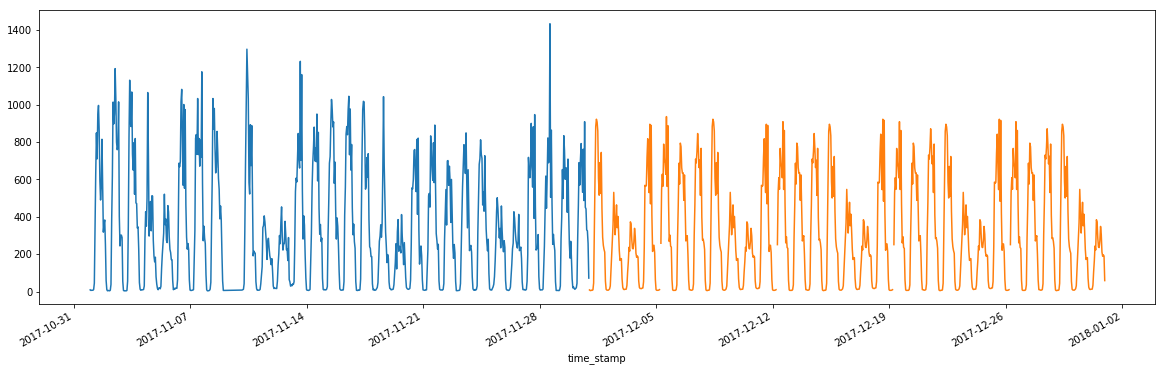

calculate 16 done in 3.0208888053894043 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      17 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      17 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      17 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      17 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      17 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.541073  992.868296   晴  
740      6_20        0.434352  797.035302   晴  
741      6_21        0.459470  843.128310   晴  
742      6_22        0.529396  971.441276   晴  
743      6_23        0.378819  695.132383   晴  


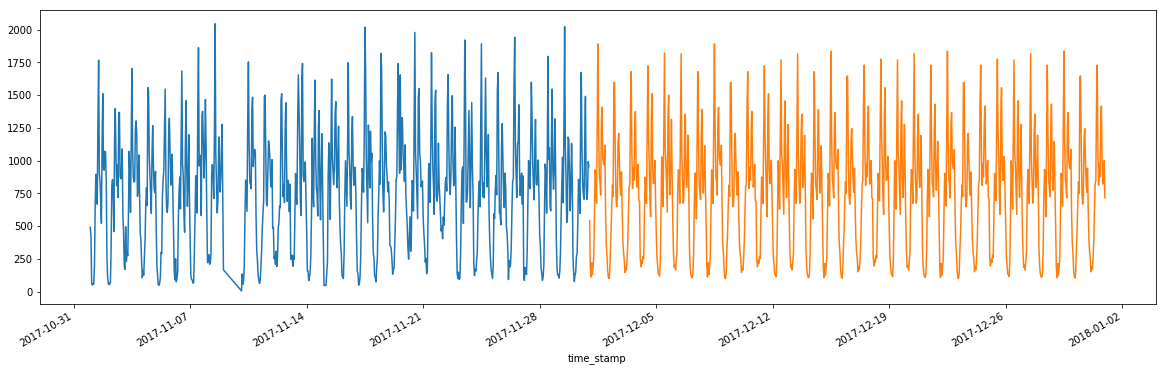

calculate 17 done in 3.7382874488830566 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      18 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      18 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      18 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      18 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      18 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.486477  360.966107   晴  
740      6_20        0.471072  349.535091   晴  
741      6_21        0.636426  472.228004   晴  
742      6_22        0.769599  571.042794   晴  
743      6_23        0.815132  604.827799   晴  


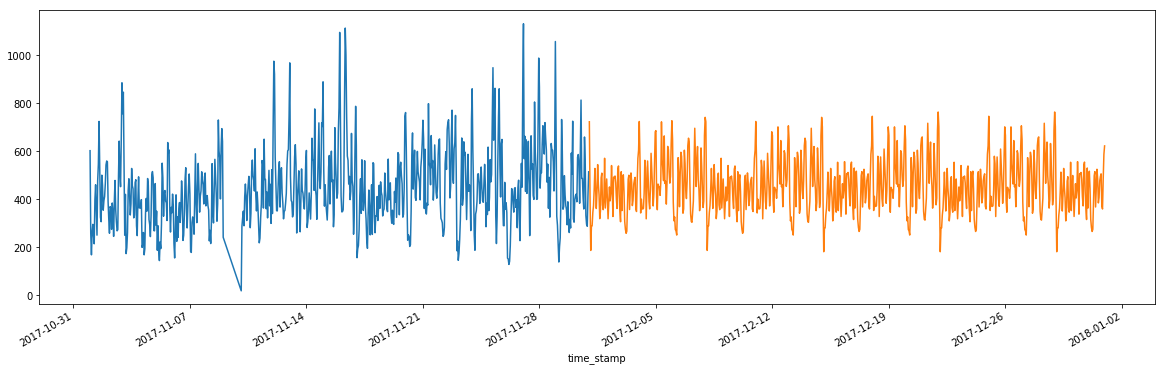

calculate 18 done in 2.261199474334717 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      19 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      19 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      19 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      19 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      19 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.474365  538.878177   晴  
740      6_20        0.329974  374.850131   晴  
741      6_21        0.422875  480.385627   晴  
742      6_22        0.580850  659.845749   晴  
743      6_23        0.436459  495.817704   晴  


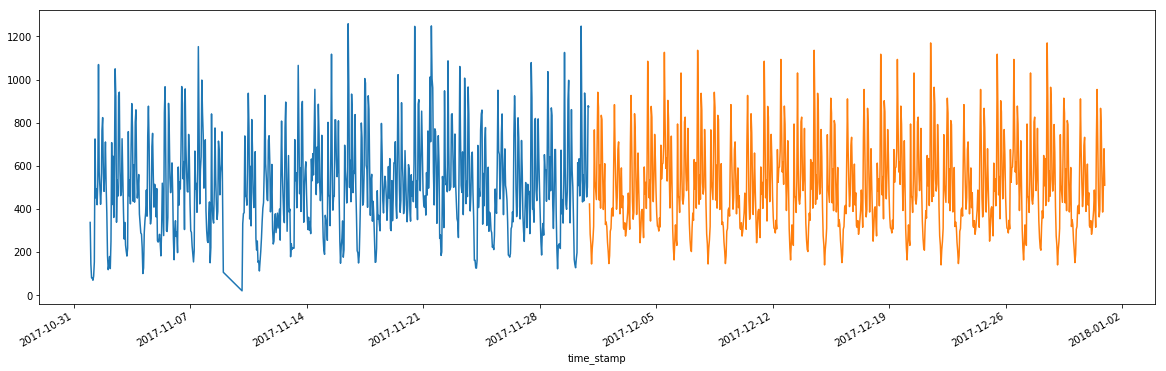

calculate 19 done in 2.6424124240875244 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      20 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      20 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      20 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      20 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      20 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.242556  629.917866   晴  
740      6_20        0.198892  516.522659   晴  
741      6_21        0.198026  514.274736   晴  
742      6_22        0.239863  622.924329   晴  
743      6_23        0.105505  273.996788   晴  


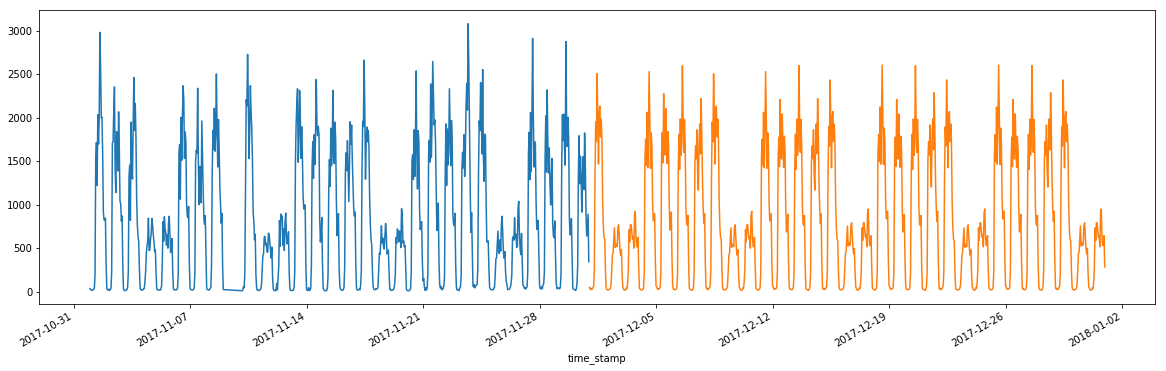

calculate 20 done in 5.613545894622803 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      21 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      21 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      21 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      21 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      21 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.461425  763.658357   晴  
740      6_20        0.382357  632.801298   晴  
741      6_21        0.381472  631.336480   晴  
742      6_22        0.461868  764.390766   晴  
743      6_23        0.346806  573.964449   晴  


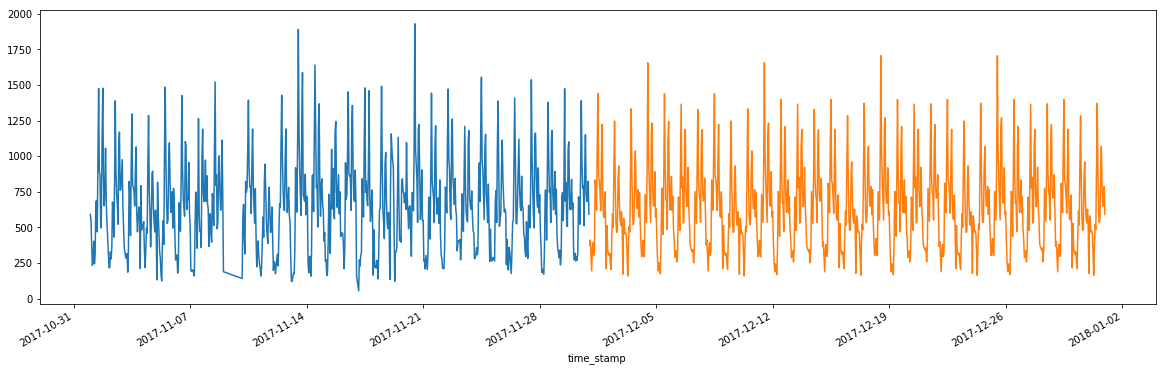

calculate 21 done in 3.199692726135254 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      22 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      22 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      22 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      22 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      22 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.228484  186.214395   晴  
740      6_20        0.219296  178.725881   晴  
741      6_21        0.237060  193.203675   晴  
742      6_22        0.176417  143.779479   晴  
743      6_23        0.027565   22.465544   晴  


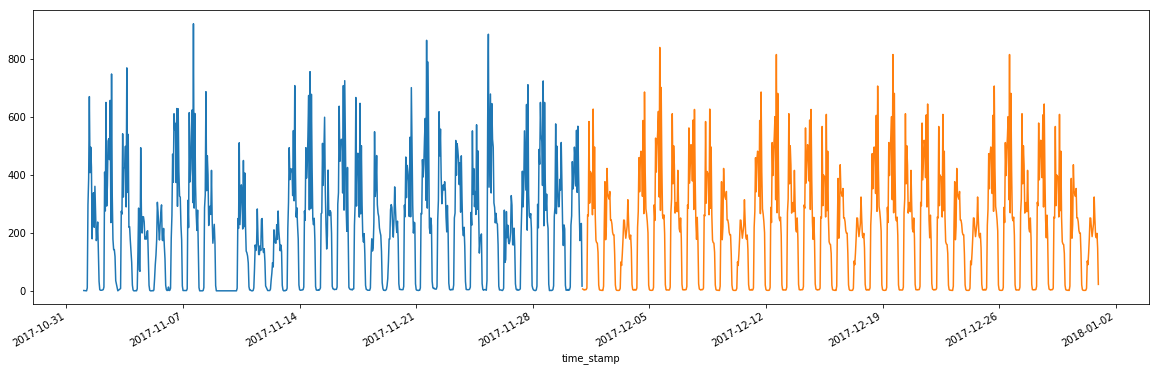

calculate 22 done in 1.713987112045288 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      23 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      23 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      23 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      23 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      23 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.385980  337.346284   晴  
740      6_20        0.376408  328.980293   晴  
741      6_21        0.535755  468.249437   晴  
742      6_22        0.557432  487.195946   晴  
743      6_23        0.748311  654.023649   晴  


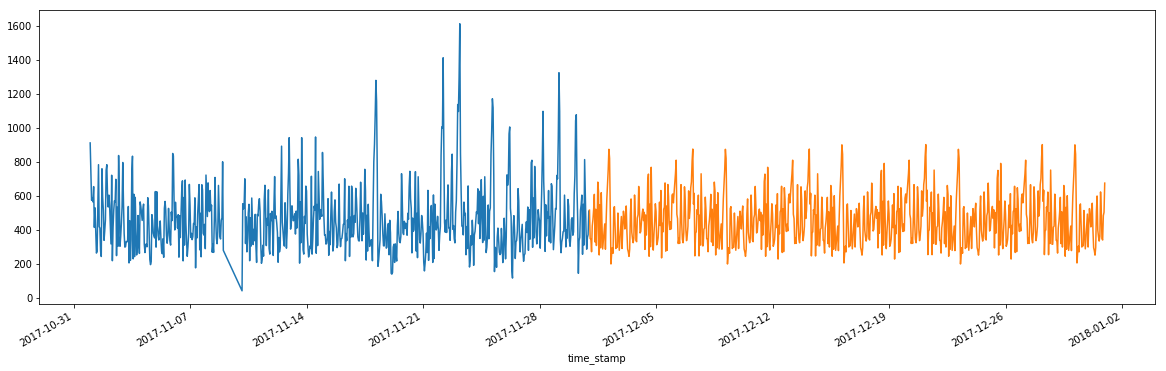

calculate 23 done in 2.7670955657958984 s
(167, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      24 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      24 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      24 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      24 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      24 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.334438  486.941158   晴  
740      6_20        0.272914  397.362360   晴  
741      6_21        0.235211  342.466635   晴  
742      6_22        0.273387  398.051428   晴  
743      6_23        0.099227  144.474523   晴  


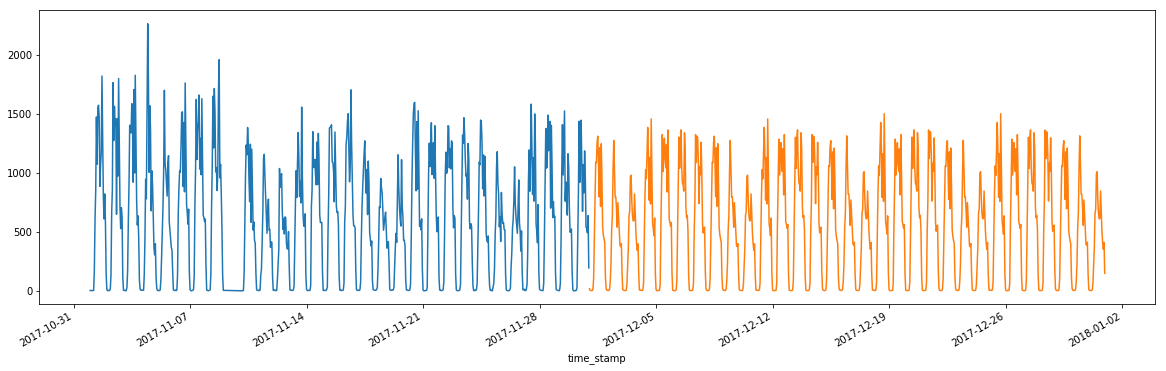

calculate 24 done in 4.212968349456787 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      25 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      25 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      25 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      25 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      25 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef    best_pred wea  
739      6_19        0.455165  1035.499721   晴  
740      6_20        0.381463   867.828029   晴  
741      6_21        0.397097   903.394752   晴  
742      6_22        0.424902   966.652708   晴  
743      6_23        0.160469   365.067002   晴  


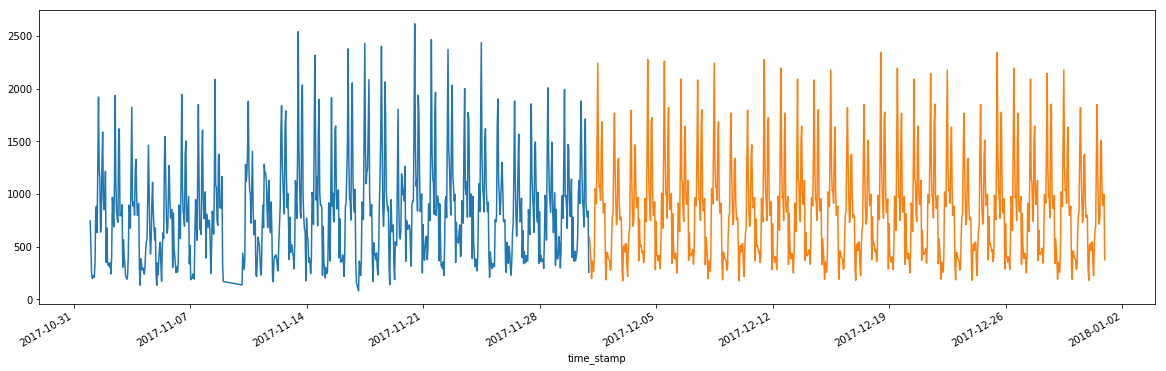

calculate 25 done in 4.0694029331207275 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      26 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      26 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      26 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      26 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      26 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.420357  435.069557   晴  
740      6_20        0.367262  380.115929   晴  
741      6_21        0.385810  399.313703   晴  
742      6_22        0.393925  407.712729   晴  
743      6_23        0.195456  202.296545   晴  


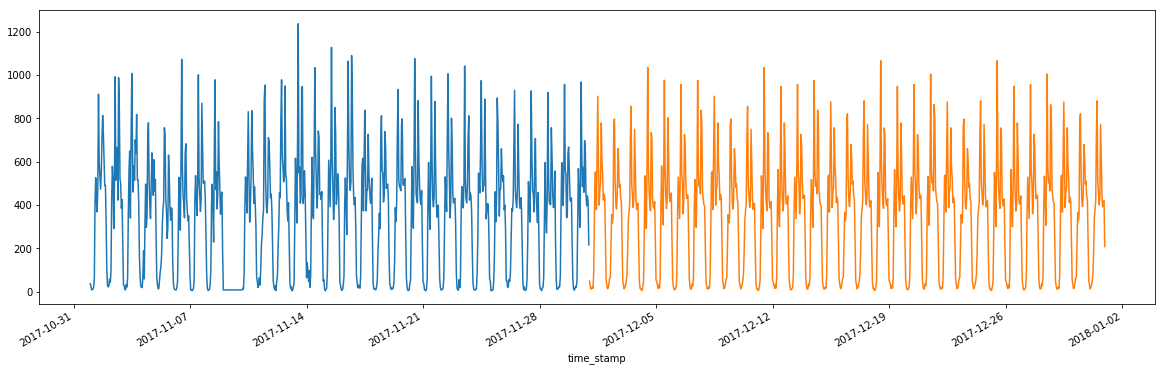

calculate 26 done in 2.20686674118042 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      27 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      27 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      27 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      27 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      27 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.219911  266.092410   晴  
740      6_20        0.201254  243.517783   晴  
741      6_21        0.158781  192.124484   晴  
742      6_22        0.178231  215.659733   晴  
743      6_23        0.040092   48.511432   晴  


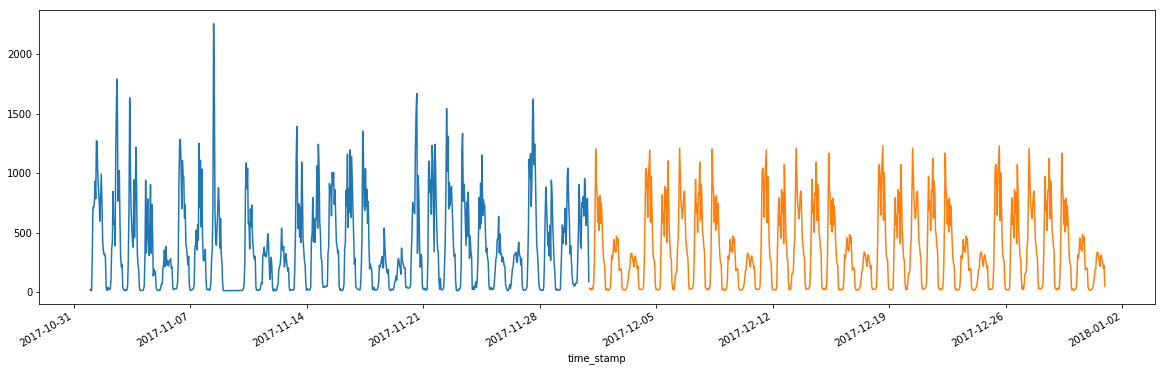

calculate 27 done in 3.594722032546997 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      28 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      28 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      28 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      28 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      28 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.547725  815.015078   晴  
740      6_20        0.450865  670.887636   晴  
741      6_21        0.472827  703.566278   晴  
742      6_22        0.534122  794.773830   晴  
743      6_23        0.326800  486.277698   晴  


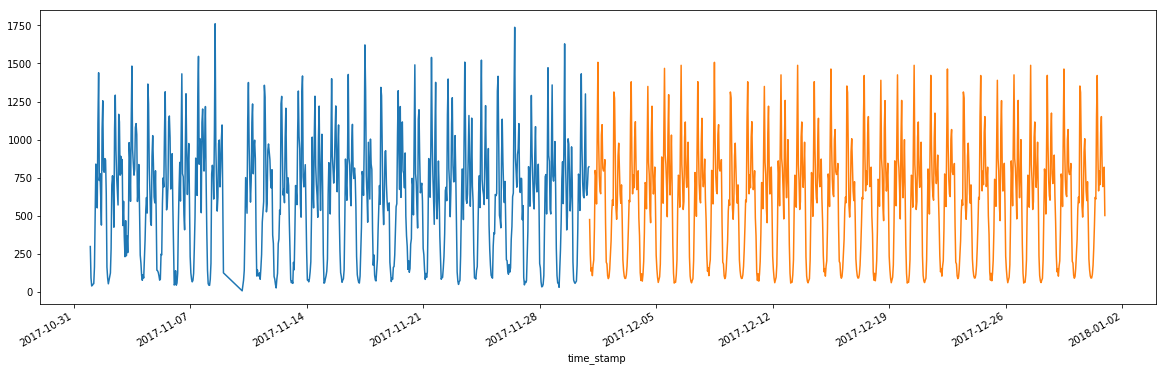

calculate 28 done in 3.0274555683135986 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      29 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      29 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      29 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      29 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      29 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef    best_pred wea  
739      6_19        0.210592  1249.864878   晴  
740      6_20        0.159963   949.378975   晴  
741      6_21        0.156914   931.286252   晴  
742      6_22        0.095162   564.786359   晴  
743      6_23        0.037076   220.046633   晴  


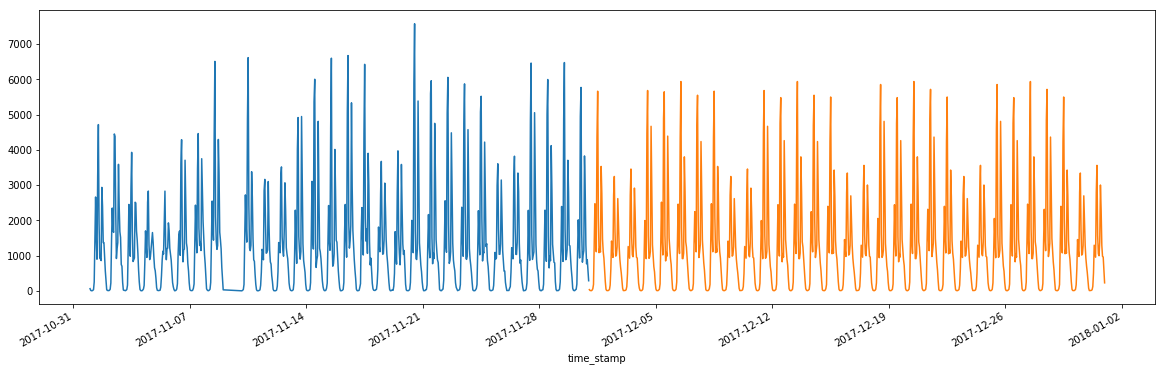

calculate 29 done in 11.542570114135742 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      30 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      30 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      30 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      30 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      30 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.525380  618.371800   晴  
740      6_20        0.430369  506.544035   晴  
741      6_21        0.488069  574.457701   晴  
742      6_22        0.590022  694.455531   晴  
743      6_23        0.520824  613.010195   晴  


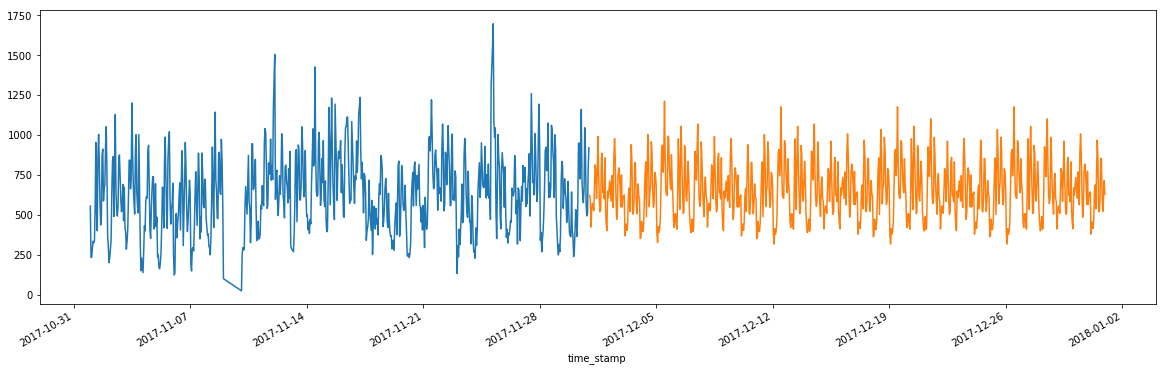

calculate 30 done in 2.696613311767578 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      31 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      31 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      31 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      31 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      31 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef    best_pred wea  
739      6_19        0.459360  1158.966488   晴  
740      6_20        0.366917   925.732555   晴  
741      6_21        0.367705   927.719638   晴  
742      6_22        0.465957  1175.608313   晴  
743      6_23        0.149149   376.303950   晴  


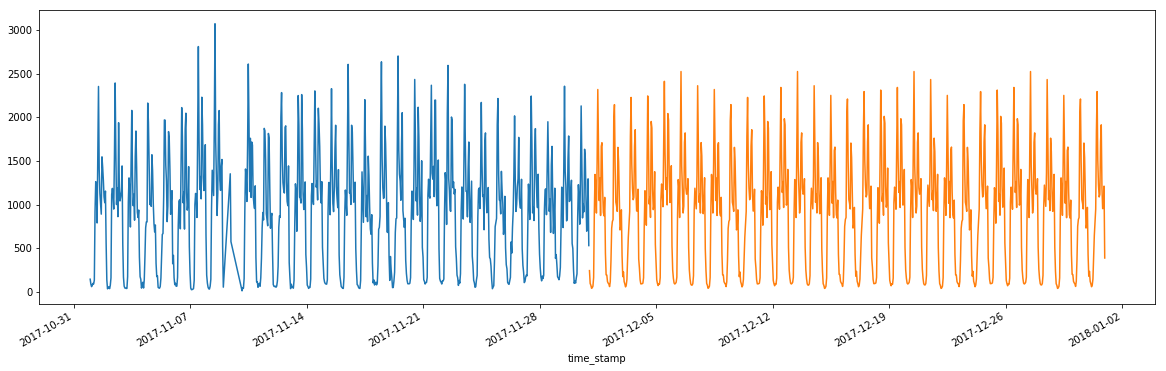

calculate 31 done in 4.401871919631958 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      32 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      32 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      32 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      32 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      32 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.522131  541.971971   晴  
740      6_20        0.371602  385.723386   晴  
741      6_21        0.327010  339.436580   晴  
742      6_22        0.395196  410.213760   晴  
743      6_23        0.158786  164.820215   晴  


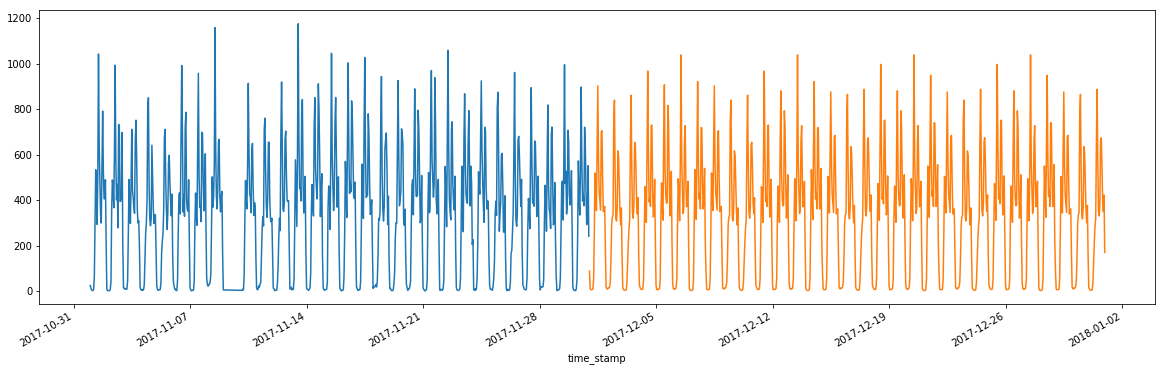

calculate 32 done in 2.359804630279541 s
(168, 2)
test_loc (744, 11)
     loc_id          time_stamp  hour  weekday  month        date  dayofyear  \
739      33 2017-12-31 19:00:00    19        6     12  2017-12-31        365   
740      33 2017-12-31 20:00:00    20        6     12  2017-12-31        365   
741      33 2017-12-31 21:00:00    21        6     12  2017-12-31        365   
742      33 2017-12-31 22:00:00    22        6     12  2017-12-31        365   
743      33 2017-12-31 23:00:00    23        6     12  2017-12-31        365   

    week_hour  week_hour_coef   best_pred wea  
739      6_19        0.252946  256.233869   晴  
740      6_20        0.230036  233.025996   晴  
741      6_21        0.202216  204.845007   晴  
742      6_22        0.235179  238.235927   晴  
743      6_23        0.054937   55.651534   晴  


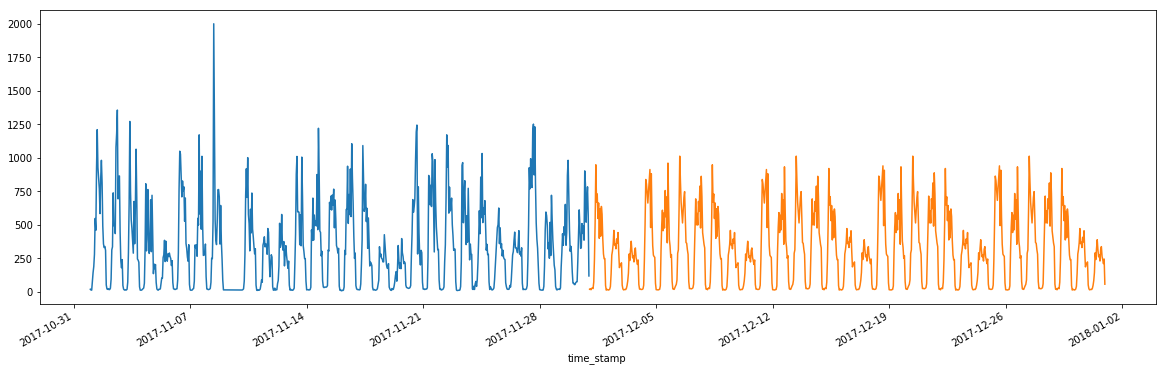

calculate 33 done in 3.488224744796753 s


In [1065]:
# 只用11月的数据
train = data[ (data.time_stamp>=pd.to_datetime("2017-11-01"))] 

loc_ids = train.loc_id.unique()

test_dates = pd.date_range('2017-12-01 00', '2017-12-31 23',freq='1h')
test = pd.DataFrame(index=pd.MultiIndex.from_product([loc_ids, test_dates], names=['loc_id', 'time_stamp'])).reset_index()

test['hour'] = test.time_stamp.dt.hour
test['weekday'] = test.time_stamp.dt.dayofweek
test['month'] = test.time_stamp.dt.month
test['date'] = test.time_stamp.dt.date
test['dayofyear'] = test.time_stamp.dt.dayofyear
test['week_hour'] = test.weekday.astype(str) + "_" + test.hour.astype(str)

train_stat = train.groupby(['loc_id', 'weekday', 'hour'], as_index=False)['count'].agg({'mean_count':'mean', 'std_count': 'std'})
train = train.merge(train_stat, 'left', ['loc_id','weekday', 'hour'])

# 根据3sigma原则，删除异常值
print (train.shape)
train = train[(train['count']>(train['mean_count']-2.7*train[ 'std_count'])) & (train['count']<(train['mean_count']+2.7*train[ 'std_count']))]
print (train.shape)

def rmse(predict, real, weight, week_hour_coef):
    rmse_value = np.sqrt( ( ( ( predict - ( real / week_hour_coef.astype(float) ) ).map(lambda x: np.sqrt(x**2)) ) * weight ).mean() )
    return rmse_value

rmse_all = None

for loc_id in loc_ids:
    with timer("calculate %s" %loc_id): 
        rmse_min = np.inf
        best_pred = None

        train_loc = train[train.loc_id == loc_id]
        test_loc  = test[test.loc_id == loc_id]
        # 得到不同星期小时的权重（七天24小时）
        train_loc_week_hour = train_loc.groupby('week_hour',as_index=False)['count'].agg({'count_mean':'mean'})
        train_loc_week_hour['week_hour_coef'] = train_loc_week_hour['count_mean'] / float(train_loc_week_hour['count_mean'].max())
        train_loc_week_hour = train_loc_week_hour[['week_hour', 'week_hour_coef']]
        train_loc_week_hour = train_loc_week_hour.fillna(1)
        
        print (train_loc_week_hour.shape)

        train_loc = pd.merge(train_loc, train_loc_week_hour, on=['week_hour'], how='left')
        # 日期衰减权重，0.85的指数次方（距离预测日期天数）
        train_loc['decay_weight'] = pd.to_datetime('20171201').dayofyear - train_loc.dayofyear
        train_loc['decay_weight'] = train_loc['decay_weight'].map(lambda x: np.power(0.85, x))

        train_loc_max = train_loc['count'].max()
        train_loc_min = train_loc['count'].min()
        # 遍历搜索最优值，乘星期小时权重和衰减权重，使rmse最小
        rmse_mid = []
        for pred in np.arange(train_loc_min, train_loc_max, 1):
            rmse1 = rmse(pred, train_loc['count'], train_loc['decay_weight'], train_loc['week_hour_coef'])
            if rmse1 < rmse_min:
                rmse_min = rmse1
                best_pred = pred

        train_loc_week_hour['loc_id'] = loc_id
        train_loc_week_hour['best_pred'] = best_pred
        train_loc_week_hour['best_pred'] = train_loc_week_hour['best_pred'] * train_loc_week_hour['week_hour_coef']
        
        test_loc = test_loc.merge(train_loc_week_hour, 'left',  ['loc_id', 'week_hour'])
        test_loc = test_loc.merge(weather[['date', 'wea']], 'left', 'date')
        
        print ("test_loc", test_loc.shape)
        print (test_loc.tail(5))
        
        data_loc = train_loc[['time_stamp', 'count']]
        plt.figure(figsize=(20, 6))
        data_loc.set_index('time_stamp')['count'].plot()
        # 最终预测结果乘以天气的修正系数
        test_loc['num_of_people']  = test_loc['best_pred'] *  test_loc.wea.map(wea_coef)
        test_loc.set_index('time_stamp')['num_of_people'].plot()
        plt.show()
        
        rmse_all = pd.concat([rmse_all, test_loc[['loc_id', 'time_stamp', 'num_of_people', 'weekday', 'hour']]], axis=0)


test = rmse_all
test.sort_values(by=['time_stamp', 'loc_id'], inplace=True)

In [1067]:
# 用历史均值填充缺失值
test[test.num_of_people.isnull()]

loc_id          time_stamp  num_of_people  weekday  hour
100      24 2017-12-05 04:00:00            NaN        1     4
102      16 2017-12-05 06:00:00            NaN        1     6
268      24 2017-12-12 04:00:00            NaN        1     4
270      16 2017-12-12 06:00:00            NaN        1     6
436      24 2017-12-19 04:00:00            NaN        1     4
438      16 2017-12-19 06:00:00            NaN        1     6
604      24 2017-12-26 04:00:00            NaN        1     4
606      16 2017-12-26 06:00:00            NaN        1     6

In [1068]:
left = data[data.loc_id.isin([16, 24])]

In [1069]:
left = left.groupby(['loc_id','weekday', 'hour'], as_index=False)['count'].mean()

In [1070]:
left = left[left.weekday==1]

In [1071]:
left = left[left.hour.isin([4,6])]

In [1072]:
left

loc_id  weekday  hour      count
28       16        1     4   6.173913
30       16        1     6  40.804348
196      24        1     4   4.000000
198      24        1     6  62.608696

In [1074]:
test.loc[(test.loc_id==24) & (test.hour==4), 'num_of_people'] = 4.000000
test.loc[(test.loc_id==16) & (test.hour==6), 'num_of_people'] = 40.804348

In [1075]:
test['time_stamp'] = test['time_stamp'].map(lambda x: x.strftime('%Y-%m-%d %H'))

In [1076]:
test[['loc_id', 'time_stamp', 'num_of_people']].to_csv('submit/submit_rule.csv', index=None)